In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(rescale=1./255)
valid_gen = ImageDataGenerator(rescale=1./255,validation_split=0.4)
target_img_shape=(64,64)
# Loading Data
train_data = train_gen.flow_from_directory("Augmented Images/Augmented Images",target_size=(64,64),shuffle=True,class_mode='binary')
valid_data = valid_gen.flow_from_directory('Original Images/Original Images',target_size=(64,64),shuffle=True,subset='training',class_mode='binary')
test_data = valid_gen.flow_from_directory('Original Images/Original Images',target_size=(64,64),shuffle=True,subset='validation',class_mode='binary')

Found 3192 images belonging to 2 classes.
Found 138 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [4]:
print('Training')
ids,counts=np.unique(train_data.classes,return_counts=True)
print(ids)
print(counts)

Training
[0 1]
[1428 1764]


In [5]:
labels=(train_data.class_indices)
labels=dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6}={}'.format(labels[i],counts[i]))

Monkeypox_augmented=1428
Others_augmented=1764


In [6]:
print('Validation')
ids,counts=np.unique(valid_data.classes,return_counts=True)
print(ids)
print(counts)

Validation
[0 1]
[62 76]


In [7]:
labels=(valid_data.class_indices)
labels=dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6}={}'.format(labels[i],counts[i]))

Monkey Pox=62
Others=76


In [8]:
train_data[0][0][0].shape # Access the first image in the first batch of the training data generator, and print its shape

(64, 64, 3)

{'Monkeypox_augmented': 0, 'Others_augmented': 1}
(32, 64, 64, 3)
(32,)
class 0.0


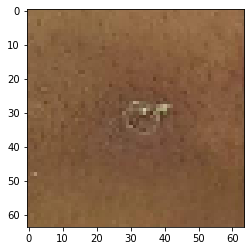

In [9]:
print(train_data.class_indices)
for image_batch, labels_batch in train_data:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class',labels_batch[0])
    break

In [10]:
# Define the input shape of the model as a tuple of integers
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense,Conv2D,AveragePooling2D,Flatten,Dropout, MaxPool2D)

model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(128,(3,3), activation='relu'))          
model.add(MaxPool2D((2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

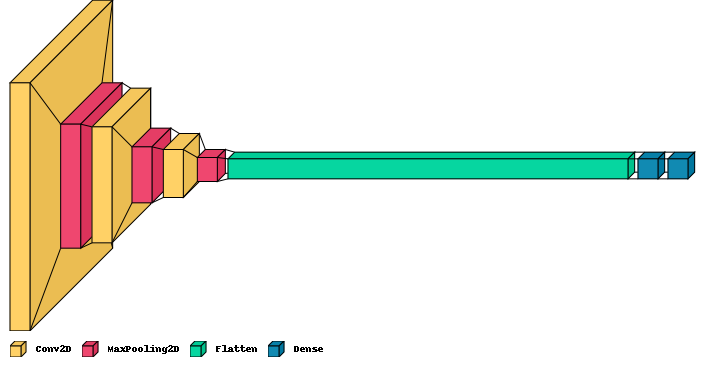

In [13]:
import visualkeras as vk
vk.layered_view(model,legend=True)

In [14]:
model.compile(loss  = 'binary_crossentropy', optimizer  = 'adam', metrics = ['accuracy'])

In [15]:
import time
start=time.time()

history=model.fit(train_data,steps_per_epoch=len(train_data),
                 validation_data=valid_data,
                 epochs=20,verbose=1)
end=time.time()
print('Time taken:{:.2f} minutes'.format((end-start)/60))

Epoch 1/20
100/100 [==============================] - 99s 976ms/step - loss: 0.6549 - accuracy: 0.6153 - val_loss: 0.5629 - val_accuracy: 0.7101
Epoch 2/20
100/100 [==============================] - 12s 124ms/step - loss: 0.6003 - accuracy: 0.6823 - val_loss: 0.4927 - val_accuracy: 0.7826
Epoch 3/20
100/100 [==============================] - 10s 104ms/step - loss: 0.5476 - accuracy: 0.7237 - val_loss: 0.4279 - val_accuracy: 0.8116
Epoch 4/20
100/100 [==============================] - 11s 108ms/step - loss: 0.4846 - accuracy: 0.7732 - val_loss: 0.3616 - val_accuracy: 0.8551
Epoch 5/20
100/100 [==============================] - 11s 105ms/step - loss: 0.4301 - accuracy: 0.7998 - val_loss: 0.3361 - val_accuracy: 0.8551
Epoch 6/20
100/100 [==============================] - 11s 107ms/step - loss: 0.3627 - accuracy: 0.8371 - val_loss: 0.2529 - val_accuracy: 0.9130
Epoch 7/20
100/100 [==============================] - 11s 109ms/step - loss: 0.3199 - accuracy: 0.8578 - val_loss: 0.2299 - val_ac

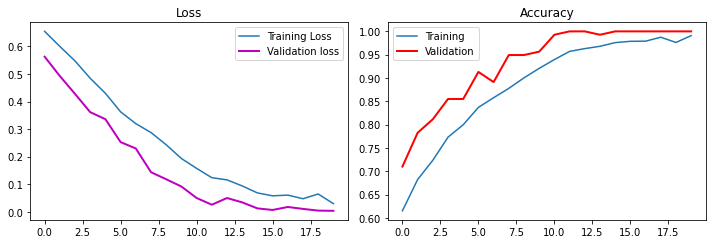

In [16]:
plt.figure(figsize=(10,3.5))
plt.subplot(1,2,1)
plt.title('Loss')
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],'m', lw=2, label= 'Validation loss')

plt.legend()
plt.subplot(1,2,2)
plt.title('Accuracy')
plt.plot(history.history['accuracy'],label='Training')
plt.plot(history.history['val_accuracy'],'r' ,lw=2, label='Validation')
plt.legend()
plt.tight_layout()
plt.show()

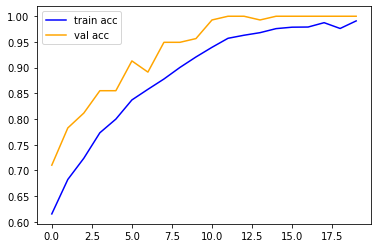

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, 'b' , label = 'train acc')
plt.plot(val_acc , 'orange' , label = 'val acc')

plt.legend()
plt.show()

In [26]:
scores = model.evaluate(valid_data, steps=len(valid_data), verbose=0)
validation_loss = scores[0]
validation_accuracy = scores[1]

print("Validation loss: {:.3f}".format(validation_loss))
print("Validation accuracy: {:.3f}".format(validation_accuracy))


Validation loss: 0.004
Validation accuracy: 1.000


In [19]:
score = model.evaluate(test_data, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0014474054332822561
Test accuracy: 1.0


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the test data and true labels
# X_test: Test data (images)
# y_true: True labels for the test data

# Obtain the predicted labels from the model
y_pred = model.predict(test_data)
y_pred = np.round(y_pred).flatten()

test_labels = test_data.classes

# Compute the confusion matrix
cm = confusion_matrix(test_labels, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


3/3 [==============================] - 1s 90ms/step
Confusion Matrix:
[[14 26]
 [26 24]]


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming you have the confusion matrix stored in the variable cm

# Flatten the confusion matrix values
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = accuracy_score(test_labels, y_pred)

# Calculate precision
precision = precision_score(test_labels, y_pred)

# Calculate recall
recall = recall_score(test_labels, y_pred)

# Calculate F1 score
f1 = f1_score(test_labels, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.4222222222222222
Precision: 0.48
Recall: 0.48
F1 Score: 0.48


1/1 [==============================] - 0s 91ms/step


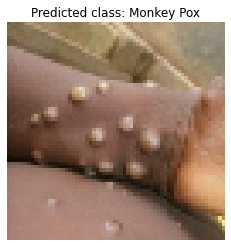

In [23]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Assuming you have a path to the image you want to predict
image_path = "Test/M09_03.jpg"

# Load the image and resize it to match the input shape of the model
img = image.load_img(image_path, target_size=(64, 64))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Expand the dimensions to match the expected input shape of the model
img_array = np.expand_dims(img_array, axis=0)

# Preprocess the image by rescaling its pixel values
img_array = img_array / 255.0

# Make the prediction
prediction = model.predict(img_array)

# Get the predicted class probability
predicted_probability = prediction[0][0]

# Define the class labels
class_labels = ["Monkey Pox", "Other"]

# Set a threshold to classify the image
threshold = 0.5

# Get the predicted class label
if predicted_probability >= threshold:
    predicted_class_label = class_labels[1]  # Monkey Pox
else:
    predicted_class_label = class_labels[0]  # Other

# Show the input image
plt.imshow(img)
plt.axis('off')

# Print the predicted class label
plt.title("Predicted class: " + predicted_class_label)
plt.show()


In [48]:
# Assuming your model is named 'model'
model.save("model.h5")


In [49]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model("model.h5")
